In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#BASIC KNOWLEDGE OF DATASET

In [76]:
df = pd.read_csv('Equipment Anamoly data.csv')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7672 entries, 0 to 7671
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  7672 non-null   float64
 1   pressure     7672 non-null   float64
 2   vibration    7672 non-null   float64
 3   humidity     7672 non-null   float64
 4   equipment    7672 non-null   object 
 5   location     7672 non-null   object 
 6   faulty       7672 non-null   int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 419.7+ KB


In [78]:
df.head()

,temperature,pressure,vibration,humidity,equipment,location,faulty
0,58.180180,25.029278,0.606516,45.694907,Turbine,Atlanta,0
1,75.740712,22.954018,2.338095,41.867407,Compressor,Chicago,0
2,71.358594,27.276830,1.389198,58.954409,Turbine,San Francisco,0
3,71.616985,32.242921,1.770690,40.565138,Pump,Atlanta,0
4,66.506832,45.197471,0.345398,43.253795,Pump,New York,0


In [110]:
df['equipment'].value_counts()

,count
equipment,
Compressor,2573
Turbine,2565
Pump,2534


In [79]:
df.isna().sum()

,0
temperature,0
pressure,0
vibration,0
humidity,0
equipment,0
location,0
faulty,0


In [80]:
df.duplicated().sum()

np.int64(0)

In [81]:
df.describe()

,temperature,pressure,vibration,humidity,faulty
count,7672.000000,7672.000000,7672.000000,7672.000000,7672.000000
mean,70.922478,35.738048,1.611809,50.016574,0.099974
std,16.200059,10.381593,0.728560,11.841479,0.299985
min,10.269385,3.620798,-0.428188,10.215077,0.000000
25%,62.777057,29.485682,1.170906,42.612817,0.000000
50%,70.156900,35.227544,1.533113,50.024744,0.000000
75%,77.568387,41.159913,1.924700,57.340513,0.000000
max,149.690420,79.887734,4.990537,89.984718,1.000000


#BASIC EDA

In [82]:
df['faulty'] = df['faulty'].astype('bool')
print(f'The Data Type is now {df['faulty'].dtypes}')

The Data Type is now bool


<Axes: ylabel='count'>

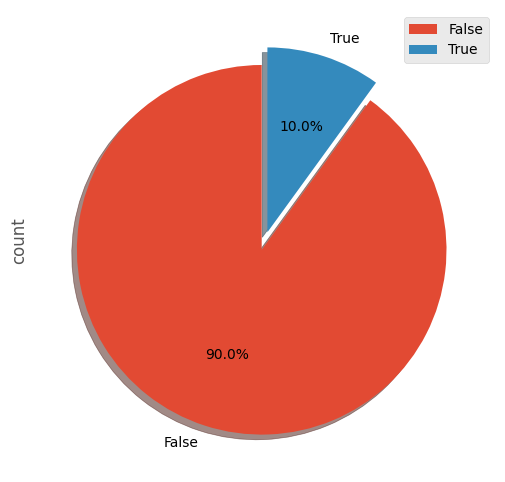

In [83]:
df['faulty'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    shadow=True,
    legend=True,
    explode=[0.05] * df['faulty'].nunique()
)


The Dataset is Imbalanced by 90-10

#PLOTTING NUMERIC COLUMNS

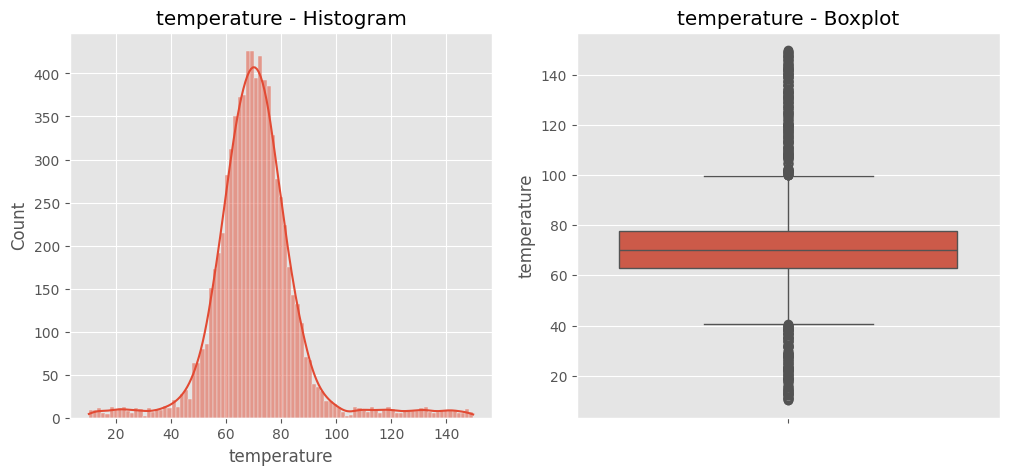

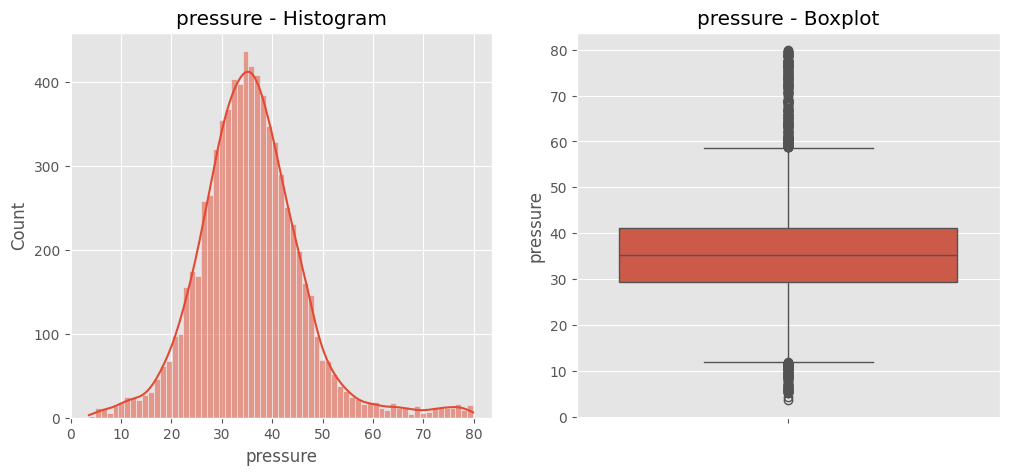

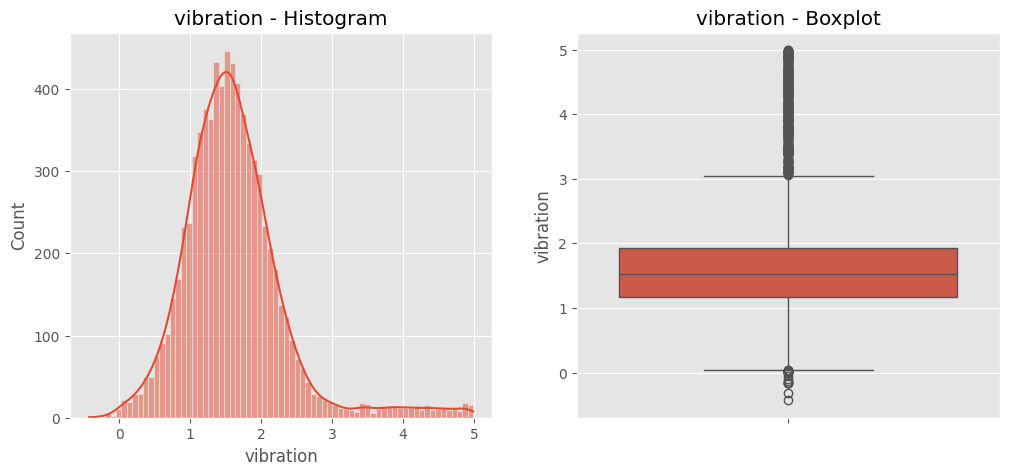

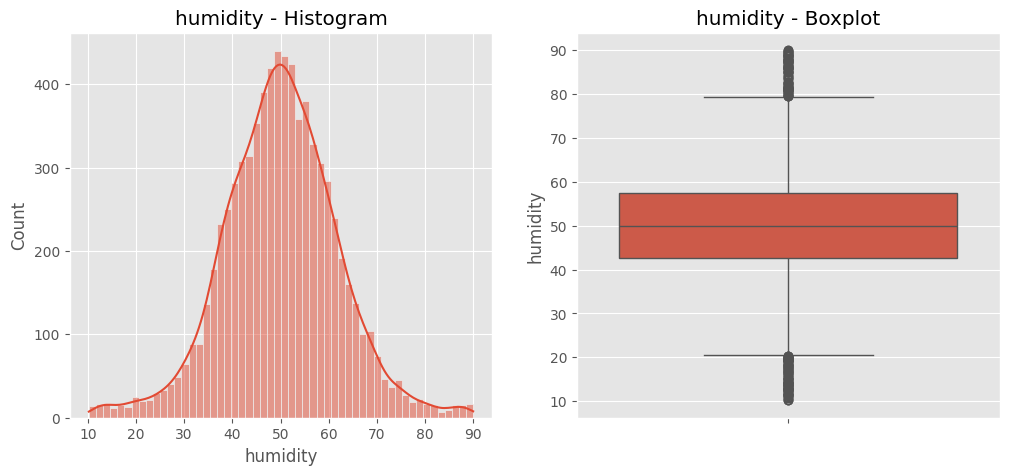

In [84]:
numeric_cols = df.select_dtypes(include='number').columns
for col in numeric_cols:
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} - Histogram')
    plt.subplot(1,2,2)
    sns.boxplot(y=df[col])
    plt.title(f'{col} - Boxplot')
    plt.show()

In [85]:
from scipy import stats

#OUTLIER ANALYSIS

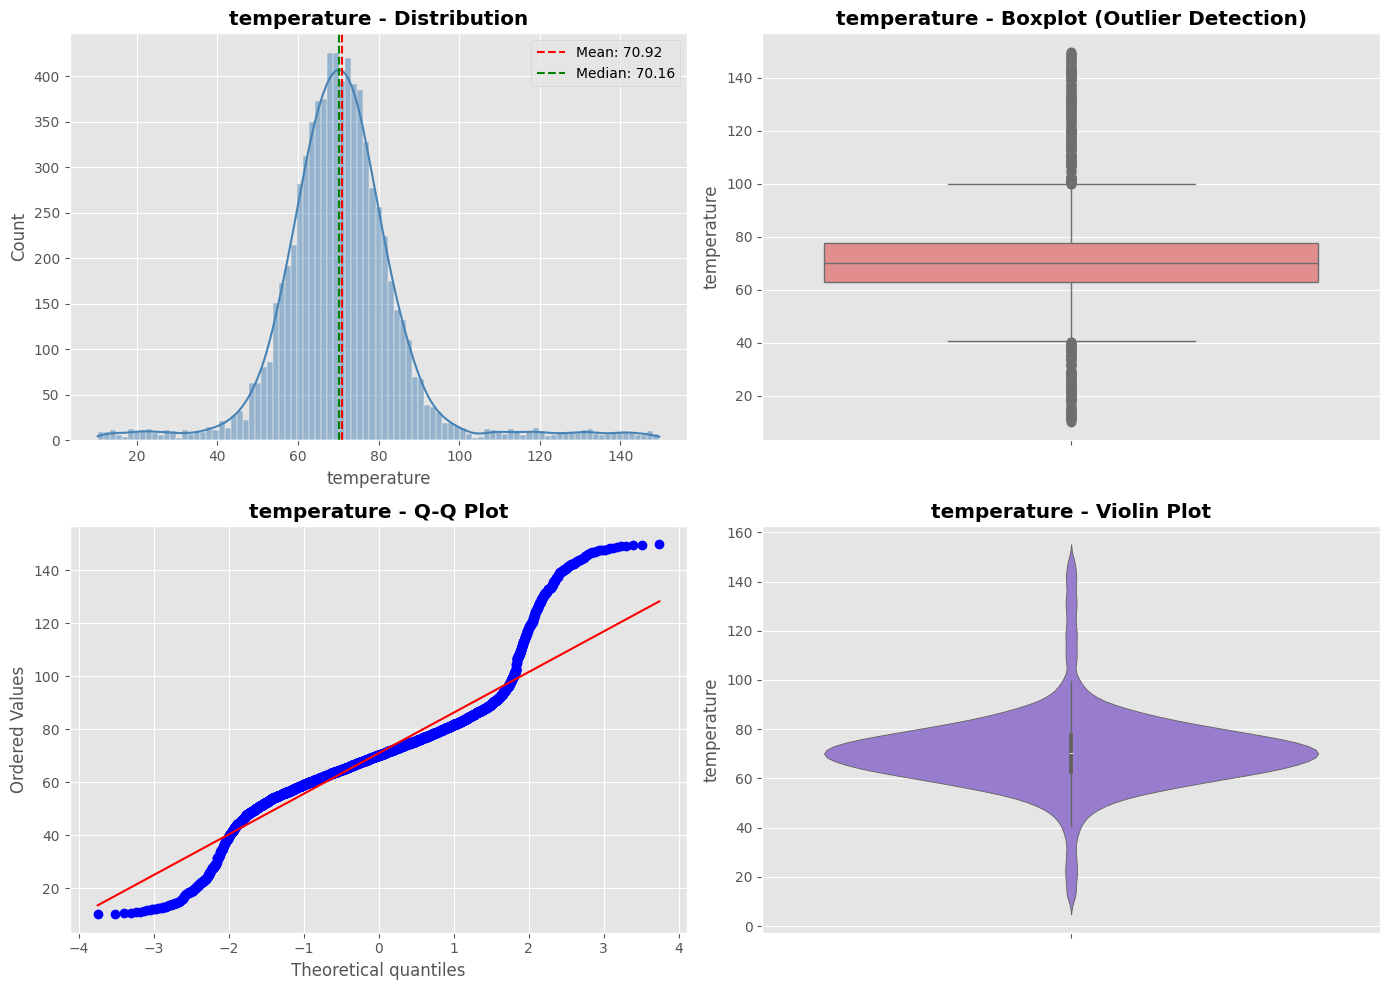


temperature - Outlier Analysis:
  Number of outliers: 462 (6.02%)
  Skewness: 0.944
  Kurtosis: 5.408


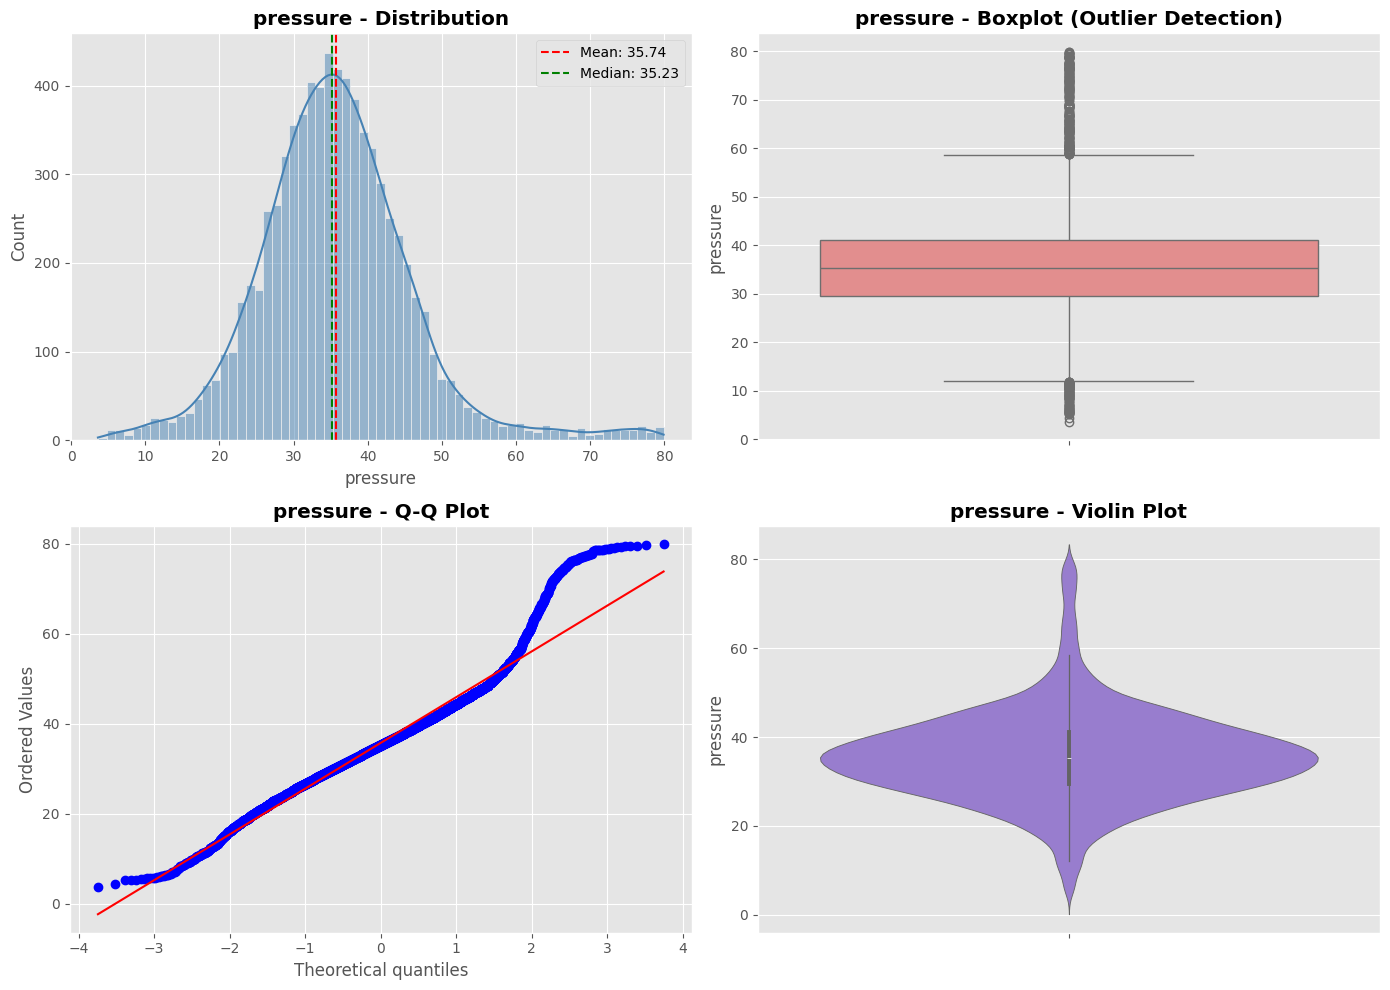


pressure - Outlier Analysis:
  Number of outliers: 310 (4.04%)
  Skewness: 0.725
  Kurtosis: 2.365


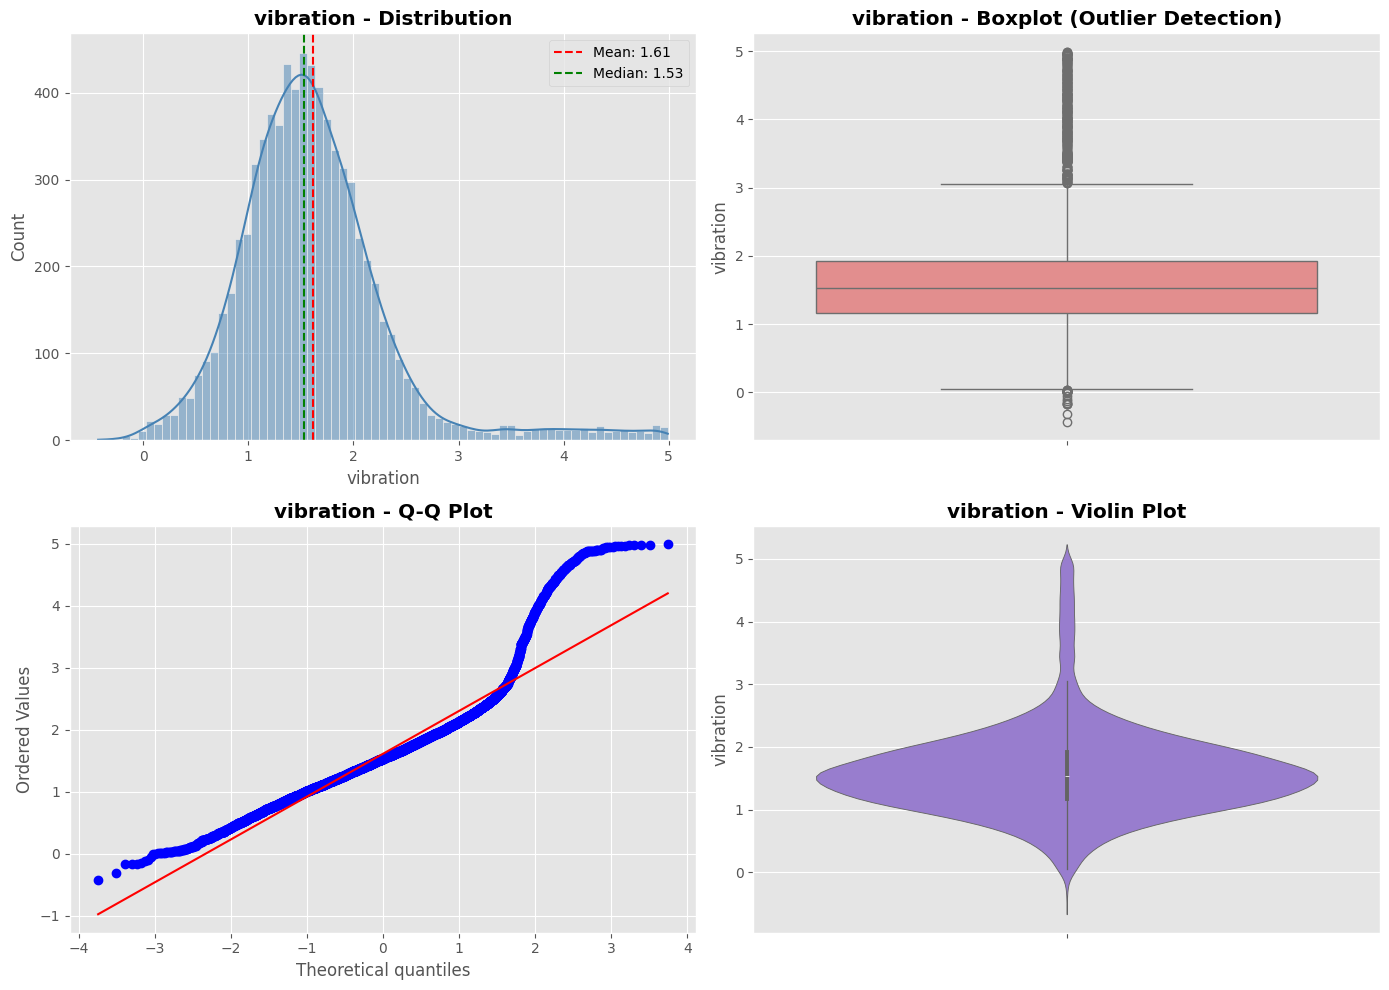


vibration - Outlier Analysis:
  Number of outliers: 327 (4.26%)
  Skewness: 1.488
  Kurtosis: 4.403


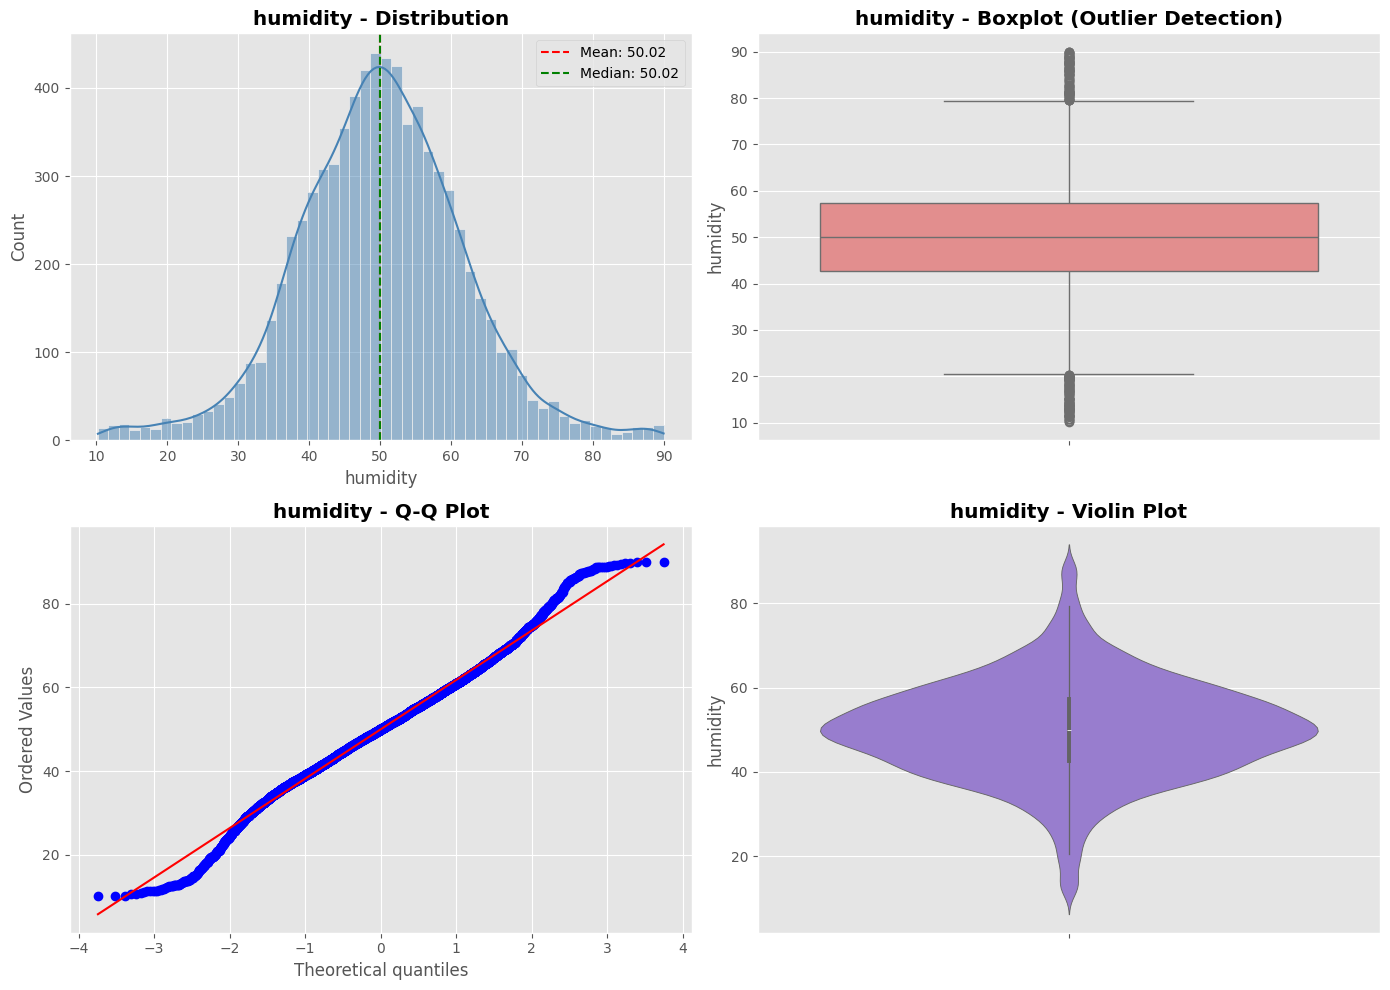


humidity - Outlier Analysis:
  Number of outliers: 211 (2.75%)
  Skewness: -0.017
  Kurtosis: 0.821


In [86]:
for col in numeric_cols:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))

    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[0, 0], color='steelblue')
    axes[0, 0].set_title(f'{col} - Distribution', fontweight='bold')
    axes[0, 0].axvline(df[col].mean(), color='red', linestyle='--', label=f'Mean: {df[col].mean():.2f}')
    axes[0, 0].axvline(df[col].median(), color='green', linestyle='--', label=f'Median: {df[col].median():.2f}')
    axes[0, 0].legend()

    # Boxplot
    sns.boxplot(y=df[col], ax=axes[0, 1], color='lightcoral')
    axes[0, 1].set_title(f'{col} - Boxplot (Outlier Detection)', fontweight='bold')

    # Q-Q Plot for normality
    stats.probplot(df[col], dist="norm", plot=axes[1, 0])
    axes[1, 0].set_title(f'{col} - Q-Q Plot', fontweight='bold')

    # Violin plot
    sns.violinplot(y=df[col], ax=axes[1, 1], color='mediumpurple')
    axes[1, 1].set_title(f'{col} - Violin Plot', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Outlier statistics
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)][col]
    print(f"\n{col} - Outlier Analysis:")
    print(f"  Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    print(f"  Skewness: {df[col].skew():.3f}")
    print(f"  Kurtosis: {df[col].kurtosis():.3f}")

#EQUIPMENT AGAINS FAULTY

<Axes: xlabel='equipment'>

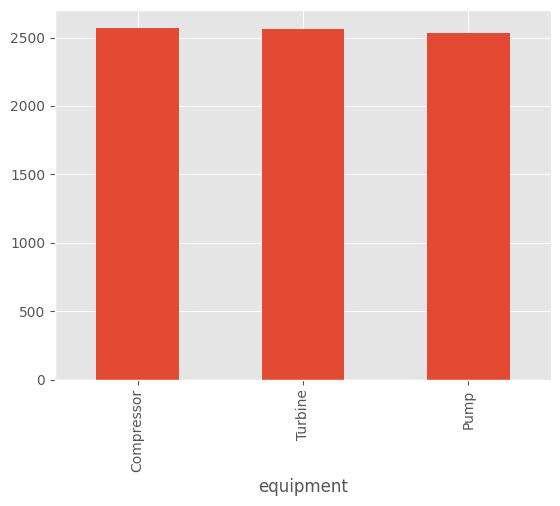

In [87]:
df['equipment'].value_counts().plot(kind='bar')

<Axes: xlabel='equipment,faulty'>

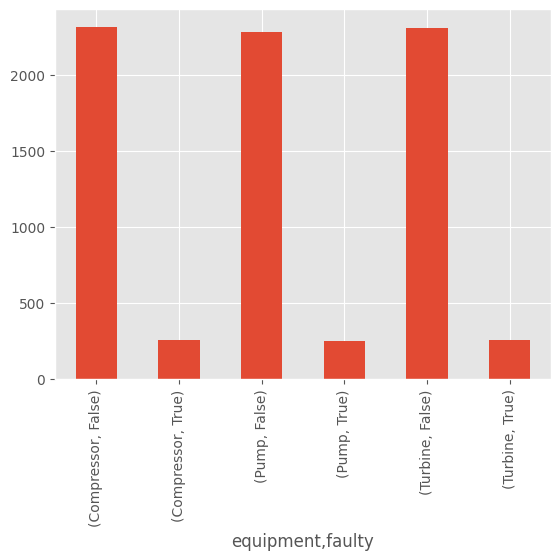

In [88]:
df.groupby(['equipment', 'faulty']).size().plot(kind='bar')


In [89]:
def bool_to_str(x):
    return 'True' if x is True else 'False'
df['faulty'] = df['faulty'].apply(bool_to_str)


<Axes: xlabel='faulty', ylabel='count'>

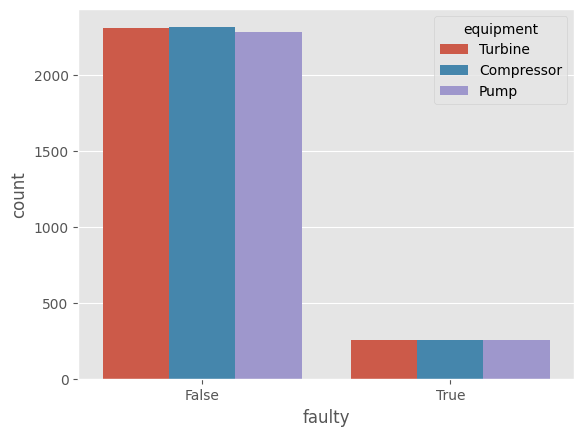

In [90]:
sns.countplot(x='faulty', hue='equipment', data=df)


In [91]:
df['faulty'] = df['faulty'].map({'True': True, 'False': False})
df['faulty'] = df['faulty'].astype(int)

<Figure size 1000x600 with 0 Axes>

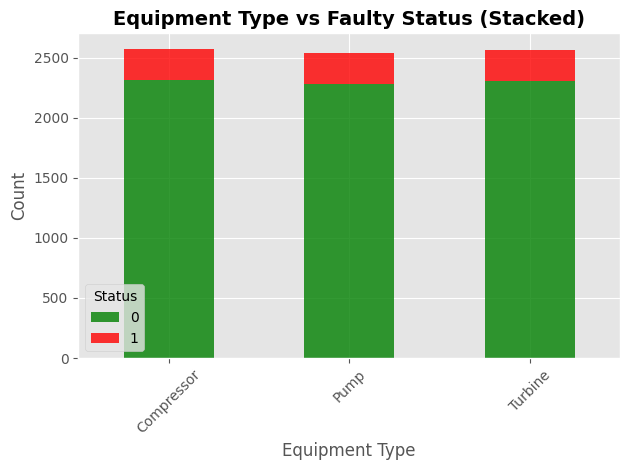

In [92]:
    # Stacked bar plot
    plt.figure(figsize=(10, 6))
    df.groupby(['equipment', 'faulty']).size().unstack().plot(
        kind='bar', stacked=True, color=['green', 'red'], alpha=0.8
    )
    plt.title('Equipment Type vs Faulty Status (Stacked)', fontweight='bold', fontsize=14)
    plt.xlabel('Equipment Type')
    plt.ylabel('Count')
    plt.legend(title='Status')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#CORRELATION ANALYSIS

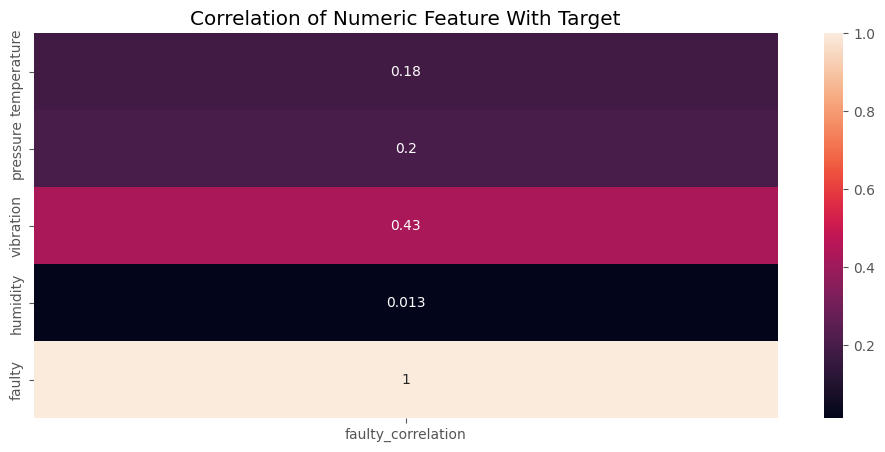

In [93]:
plt.figure(figsize=(12,5))
corr = df.select_dtypes(include='number').corrwith(df['faulty'])
corr = corr.to_frame(name='faulty_correlation')
plt.title('Correlation of Numeric Feature With Target')
sns.heatmap(corr, annot=True)
plt.show()


#DROPPING LOCATION - no need

In [94]:
df.drop(columns=['location'],inplace=True)
df['faulty'] = df['faulty'].astype('bool')

#SEPERATE NUM AND CAT COLUMNS

In [95]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = df.select_dtypes(include=['object', 'category']).columns.tolist()
target = 'faulty'
if target in num_features: num_features.remove(target)
if target in cat_features: cat_features.remove(target)
print("Numeric:", num_features)
print("Categorical:", cat_features)

Numeric: ['temperature', 'pressure', 'vibration', 'humidity']
Categorical: ['equipment']


#SPLITTING INTO TRAIN AND TEST

In [96]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['faulty'])
Y = df['faulty']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.4,random_state=42)

In [97]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4603 entries, 5748 to 7270
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  4603 non-null   float64
 1   pressure     4603 non-null   float64
 2   vibration    4603 non-null   float64
 3   humidity     4603 non-null   float64
 4   equipment    4603 non-null   object 
dtypes: float64(4), object(1)
memory usage: 215.8+ KB


In [98]:
y_train.value_counts()

,count
faulty,
False,4150
True,453


#NUMERIC AND CATEGORICAL TRANSFORMER PIPELINE

In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

In [100]:
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, num_features),
    ('cat', categorical_transformer, cat_features)
])

In [111]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['temperature', 'pressure', 'vibration',
                                  'humidity']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['equipment'])])

#MODEL TRAINING AND FINAL PIPELINE

In [102]:

from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report, confusion_matrix, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
import numpy as np

brf = BalancedRandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    min_samples_leaf=3,
    min_samples_split=10,  # Added to prevent overfitting
    max_features='sqrt',
    class_weight={0: 1, 1: 9},
    random_state=42,
    n_jobs=-1,
)

pipe = Pipeline([
    ('prep', preprocessor),
    ('model', brf)
])


param_dist = {
    'model__n_estimators': [50, 100, 200],
    'model__max_depth': [10, 15, 20, None],
    'model__min_samples_leaf': [1, 2, 3, 5],
    'model__min_samples_split': [5, 10, 15],
    'model__max_features': ['sqrt', 'log2', 0.5]
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

f1_class1 = make_scorer(f1_score, pos_label=1)

#using random searchcv for better results
search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=20,  # Increased from 12
    cv=skf,
    scoring=f1_class1,
    verbose=2,
    n_jobs=-1,
    random_state=42,
    return_train_score=True
)


search.fit(X_train, y_train)


# Get predictions and probabilities
y_train_pred_proba = search.predict_proba(X_train)[:, 1]
y_test_proba = search.predict_proba(X_test)[:, 1]


#adjusting best threshold for better results
best_thresh = 0.35
best_f1 = 0

for thresh in np.arange(0.1, 0.9, 0.01):
    y_temp = (y_test_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_temp, pos_label=1)
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

y_train_pred = (y_train_pred_proba >= best_thresh).astype(int)
y_test_pred = (y_test_proba >= best_thresh).astype(int)




Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [112]:
pipe

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['temperature', 'pressure',
                                                   'vibration', 'humidity']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['equipment'])])),
                ('model',
                 BalancedRandomForestClassifier(class_weight={0: 1, 1: 9},
                                                min_samples_leaf=3,
                                                min_samples_split=10, n_jobs=-1,
                                                random_state=42))])

#TEST AND TRAIN MATRIX

In [103]:
from sklearn.metrics import (f1_score, precision_score, recall_score,
                             classification_report, confusion_matrix,
                             make_scorer, roc_auc_score, roc_curve)

In [104]:
print("\nBest Parameters:", search.best_params_)
print(f"Optimal Classification Threshold: {best_thresh:.3f}")
print(f"Cross-validation F1 Score: {search.best_score_:.4f}")

# Training metrics
print("\n--- TRAINING SET METRICS ---")
print(f"F1 Score (Macro): {f1_score(y_train, y_train_pred, average='macro'):.4f}")
print(f"F1 Score (Class 1): {f1_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"Precision (Class 1): {precision_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"Recall (Class 1): {recall_score(y_train, y_train_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_train, y_train_pred_proba):.4f}")

# Test metrics
print("\n--- TEST SET METRICS ---")
print(f"F1 Score (Macro): {f1_score(y_test, y_test_pred, average='macro'):.4f}")
print(f"F1 Score (Class 1): {f1_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"Precision (Class 1): {precision_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"Recall (Class 1): {recall_score(y_test, y_test_pred, pos_label=1):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_test_proba):.4f}")

print("\n--- CLASSIFICATION REPORT ---")
print(classification_report(y_test, y_test_pred, target_names=['Non-Faulty', 'Faulty']))


Best Parameters: {'model__n_estimators': 50, 'model__min_samples_split': 5, 'model__min_samples_leaf': 1, 'model__max_features': 0.5, 'model__max_depth': 15}
Optimal Classification Threshold: 0.720
Cross-validation F1 Score: 0.8122

--- TRAINING SET METRICS ---
F1 Score (Macro): 0.9715
F1 Score (Class 1): 0.9486
Precision (Class 1): 0.9394
Recall (Class 1): 0.9581
ROC-AUC: 0.9992

--- TEST SET METRICS ---
F1 Score (Macro): 0.9362
F1 Score (Class 1): 0.8853
Precision (Class 1): 0.8984
Recall (Class 1): 0.8726
ROC-AUC: 0.9850

--- CLASSIFICATION REPORT ---
              precision    recall  f1-score   support

  Non-Faulty       0.99      0.99      0.99      2755
      Faulty       0.90      0.87      0.89       314

    accuracy                           0.98      3069
   macro avg       0.94      0.93      0.94      3069
weighted avg       0.98      0.98      0.98      3069



#CONFUSION MATRIX

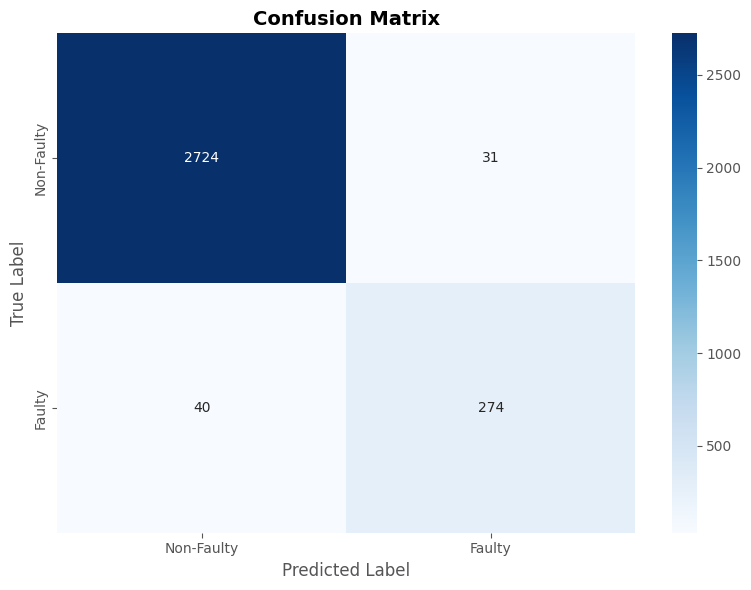


Confusion Matrix:
[[2724   31]
 [  40  274]]


In [105]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Faulty', 'Faulty'],
            yticklabels=['Non-Faulty', 'Faulty'])
plt.title('Confusion Matrix', fontweight='bold', fontsize=14)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

print("\nConfusion Matrix:")
print(cm)

#FEATURE IMPORTANCE


--- TOP 10 FEATURE IMPORTANCES ---
                feature  importance
0           temperature    0.327912
1              pressure    0.241003
2             vibration    0.235673
3              humidity    0.172998
5        equipment_Pump    0.009824
4  equipment_Compressor    0.006904
6     equipment_Turbine    0.005687


<Figure size 1000x800 with 0 Axes>

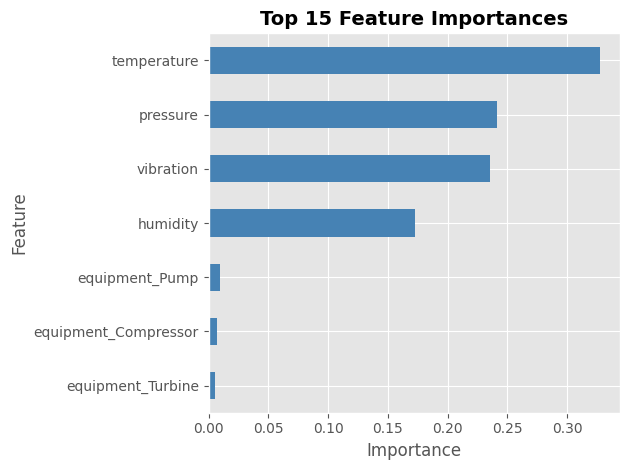

In [106]:
if hasattr(search.best_estimator_.named_steps['model'], 'feature_importances_'):
    feature_names = (num_features +
                    search.best_estimator_.named_steps['prep']
                    .named_transformers_['cat']
                    .named_steps['encoder']
                    .get_feature_names_out(cat_features).tolist())

    importances = search.best_estimator_.named_steps['model'].feature_importances_
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': importances
    }).sort_values('importance', ascending=False)

    print("\n--- TOP 10 FEATURE IMPORTANCES ---")
    print(feature_importance_df.head(10))

    plt.figure(figsize=(10, 8))
    top_n = 15
    feature_importance_df.head(top_n).plot(
        x='feature', y='importance', kind='barh',
        color='steelblue', legend=False
    )
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title(f'Top {top_n} Feature Importances', fontweight='bold', fontsize=14)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

#PICKLING THE PIPELINE

In [107]:
import pickle

In [109]:
with open('factorysensors.pkl', 'wb') as f:
    pickle.dump(search, f)
    print("Pickled successfully")

Pickled successfully


In [ ]:
from google.colab import drive
drive.mount('/content/drive')